# Presidential campaign Analyser

**Harshit Singh**

**GENERAL DESCRIPTION:**
Our Project will try to analyse the current political consensus for on going Presidential elections of America. We are collecting our dataset using twitterAPI (twython).We are collecting the tweets of specific hashtags and then manually classifying these tweets in four specific categories- Trump_positive, Trump_negative, Hillary_positive, Hillary_negative, then using these four classes, we would be analysing the general sentiments of masses.

**DATA COLLECTION:**
Now to collect the data we will be using library called Twython. We will be searching tweets which will have certain hashtags and those hastags are related to either the two presidential candidates Donald trump and hillary clinton or related to the presidential election. 

**LOADING DATA INTO MATRIX**:
To load the data into matrix we used CountVectorizer which is in **sklearn.feature_extraction.text**.

**CLASSES FOR THE PROJECT**:
We have divided the classes into four parts that is **HILLARY_POSITIVE**,**HILLARY_NEGATIVE**,**TRUMP_POSITIVE**,**TRUMP_NEGATIVE**

**EXAMPLE OF TWEETS WHICH EACH CLASS CAN CONTAIN**:

**HILLARY_POSITIVE**:
MAKE UR VOTE COUNT!#VOTEHILLARY #pesidentialelection2016

**HILLARY_NEGATIVE**:
I don't get it. You would have to be deranged with no morals to vote for her #NeverHillary

**TRUMP_POSITIVE**:
Gonna beat her in votes too❗❗ #vote #trump #donaldtrump #thedonald #election #campaign #president#2016

**TRUMP_NEGATIVE**: #NeverTrump #DumpTrump #NeverGOP #DonTheCon #Trump

We dicarded the neutral tweets from our dataset.

**MODEL SELECTION**:
We are using Four Classifiers from which we will use the best classifier for analysing our result.

**CLASSIFIERS USED**:
 - DECISION TREE CLASSIFIER
 - MultinomialNB
 - Logistic Regression
 - Support Vector Classifier
 
**RESULT OF THIS PROJECT**

After getting the best classifier we will check the occurrence of test tweets in each class and then we will subtract the vlaue of negative class from the positive and then whoever has a highest score will most likely win the election. 

Tools Used: Twython, Scikit learn, Python-3.5, numpy, matplotlib




In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import io
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from twython import Twython
import time

# PHASE 1 OF THE PROJECT

**DATA COLLECTION CODE OF THE PROJECT**

WE HAVE ALREADY RUN THE CODE BELOW THIS CELL.

AND DATA HAS BEEN SORTED INTO THE FOUR CLASSES THAT WE HAVE MENTIONED ABOVE.

In [2]:
consumer_key = 'kxP3IJBXu1allrzqFuhOgU4vH'
consumer_secret = 'ivCGzqL8sRMiYkUHrgqkhFfdkyBaDalOKbdAUGLTQgr4clM6iW'
access_token = '131175053-cQxTTiC1y9IMFgmG2LOG9cCmlG3iteg59XfGzTs8'
access_token_secret = 'hbnTi53BrKPO0wGhrq0vjsJfxApuU5SD8XNemrrs16qbU'

t = Twython(app_key=consumer_key, 
            app_secret=consumer_secret, 
            oauth_token=access_token, 
            oauth_token_secret=access_token_secret)


hash_file=open("Hashtags.txt",'r')
tweet_file = open('tweets2.txt', 'w')
tags = hash_file.read().split()

for tag in tags:
    try:
        search = t.search(q=tag, count=100,lang='en',since_id='2016-10-25')
    except:
        print('Rate limit exceeded sleeping for 15 minutes.')
        time.sleep(61 * 15)        
    tweets = search['statuses']



for tweet in tweets:
    text = tweet['text']
    if "RT" not in text:
        try:
            tweet_file.write(text)
        except:
            pass
                            
tweet_file.close()
hash_file.close()

**STORING DATA INTO MATRIX**

In [5]:
file_names=['data/hillary_negative.txt','data/hillary_positive.txt','data/trump_negative.txt','data/trump_positive.txt']

**THE FUNCTION BELOW IS TO TOKENIZE THE CONTENT OF THE FILES**

In [6]:
def tokenize(text):
    
    x=re.findall("\s*(\d+|\w+|.)", text.lower())
    for i in range(len(x)):
        if i==len(x)-1 and x[i]=='not':
            return x 
        
        if x[i]=='not' and i!= len(x):
            if(i == len(x)-2) and x[i]== 'not':
                x[i+1] = "not_%s"%x[i+1]
                return x
            x[i+1]="not_%s"%x[i+1]
            x[i+2]="not_%s"%x[i+2]
        
                   
        
                    

    return x

** THE CELL BELOW WILL READ THE CONTENT OF THE FOUR FILES AND ALSO LABEL IT**

In [7]:
content=[]
labels = []
for i,filename in enumerate(file_names):
    f=open(filename,'r',encoding="utf8")
    temp = f.read().split('<sep>')
    for x in temp:
        content.append(x.strip())
        labels.append(i)
labels = np.asarray(labels)

In [8]:
def do_vectorize(filenames, tokenizer_fn=tokenize, min_df=1,
                 max_df=1., binary=True, ngram_range=(1,1),dtype=int):


    
    vec = CountVectorizer(input='content',tokenizer=tokenizer_fn,
                          ngram_range=ngram_range,min_df=min_df,max_df=max_df,binary=binary,dtype=int)
    matrix = vec.fit_transform(filenames)
    X=(matrix,vec)
    
    return X

    
    
matrix, vec = do_vectorize(content)

** THE CELL BELOW IS TO SHOW THE SHAPE OF THE MATRIX CREATED**

In [9]:
print ('matrix represents %d documents with %d features' % (matrix.shape[0], matrix.shape[1]))
print(labels.shape)

matrix represents 1045 documents with 3578 features
(1045,)


** THE CELL BELOW SHOWS THE BAR GRAPH PLOT OF THE CLASS FREQUENCIES**

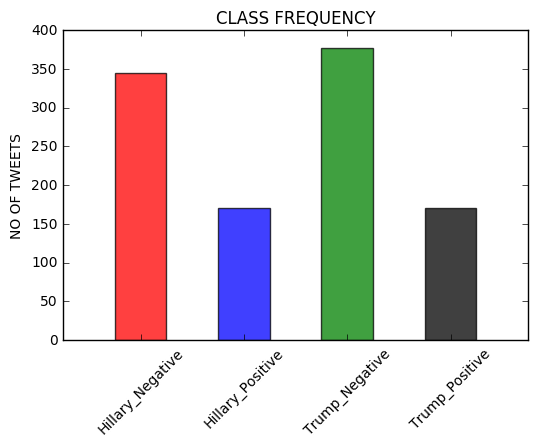

In [10]:
tweets=[]
for name in file_names:
    f=open(name,'r',encoding='utf8')
    tweets.append(len(f.readlines()))
    
fig=plt.figure()
ax=fig.add_subplot(111)
width=0.2
r1=ax.bar(0.2,tweets[0],width,color='red',alpha=0.75)
r2=ax.bar(0.4+width,tweets[1],width,color='blue',alpha=0.75)
r3=ax.bar(0.8+width,tweets[2],width,color='green',alpha=0.75)
r4=ax.bar(1.2+width,tweets[3],width,color='black',alpha=0.75)
label=['Hillary_Negative','Hillary_Positive','Trump_Negative','Trump_Positive']
ax.set_ylabel('NO OF TWEETS')
ax.set_title('CLASS FREQUENCY')
ax.set_xticks([0.3,0.7,1.1,1.5])
l=ax.set_xticklabels(label)
ax.set_xlim(0,1.8)
plt.setp(l,rotation=45, fontsize=10)
plt.show()

** THIS BELOW FUNCTION IS USED JUST TO TAKE OUT THE FREQUENCY OF THE FEATURES**

In [11]:
def do_vectorize1(filenames, tokenizer_fn=tokenize, min_df=1,
                 max_df=1., binary=True, ngram_range=(1,1),dtype=int):


    
    vec = TfidfVectorizer(input='content',tokenizer=tokenizer_fn,
                          ngram_range=ngram_range,min_df=min_df,max_df=max_df,binary=binary,dtype=int)
    matrix = vec.fit_transform(filenames)
    X=(matrix,vec)
    
    return X

    
    
matrix1, vec1 = do_vectorize1(content)

**BELOW ARE THE TOP 100 FEATURES ACCORDING TO MY MATRIX**

In [12]:
indices = np.argsort(vec1.idf_)[::-1]
features = vec1.get_feature_names()
top_n = 100
top_features = [features[i] for i in indices[:top_n]]
idfs = [vec1.idf_[i] for i in indices[:top_n]]
for i in range(top_n):
    print('Word: {}\tIDF: {:.4f}'.format(top_features[i],idfs[i]))

Word: lovewins	IDF: 7.2596
Word: itv	IDF: 7.2596
Word: kufour	IDF: 7.2596
Word: kudos	IDF: 7.2596
Word: ksuzxiunxlyou	IDF: 7.2596
Word: known	IDF: 7.2596
Word: knowing	IDF: 7.2596
Word: knew	IDF: 7.2596
Word: kmzs1cj9yw	IDF: 7.2596
Word: klan	IDF: 7.2596
Word: kind	IDF: 7.2596
Word: kimpossible	IDF: 7.2596
Word: kim	IDF: 7.2596
Word: killers	IDF: 7.2596
Word: babies	IDF: 7.2596
Word: kidding	IDF: 7.2596
Word: kiddie	IDF: 7.2596
Word: kiddernoggin	IDF: 7.2596
Word: kicked	IDF: 7.2596
Word: l5qqz9chtivanka	IDF: 7.2596
Word: l5taqyrqzq	IDF: 7.2596
Word: l7jpggjpgzhow	IDF: 7.2596
Word: laugh	IDF: 7.2596
Word: learned	IDF: 7.2596
Word: leaked	IDF: 7.2596
Word: lcxntyxab7msm	IDF: 7.2596
Word: lb	IDF: 7.2596
Word: laying	IDF: 7.2596
Word: law	IDF: 7.2596
Word: laughing	IDF: 7.2596
Word: latinx	IDF: 7.2596
Word: azz	IDF: 7.2596
Word: latinovictoryus	IDF: 7.2596
Word: latinos	IDF: 7.2596
Word: latina	IDF: 7.2596
Word: latiffani1	IDF: 7.2596
Word: ax75cd79on	IDF: 7.2596
Word: large	IDF: 7.2596
W

# PHASE 2 OF THE PROJECT

**PERFORMANCE**

We are using accuracy as performance metric

**BASELINE PREDICTION**

** WHEN THE LABELS ARE TAKEN AS RANDOM OR MAJORITY CLASS **

In [13]:
labels1 = np.random.randint(0, 4,len(labels))
labels2 = [2]*len(labels)
print('RANDOM CLASS',accuracy_score(labels,labels1))
print('HIGH CLASS',accuracy_score(labels,labels2))

RANDOM CLASS 0.251674641148
HIGH CLASS 0.355023923445


In [25]:
penalty=np.linspace(0.1, 1.0, num=100)
score=[]
score1=[]
score2=[]
score3=[]

** THE BELOW CODE IS FOR MODEL SELECTION **

In [28]:
import pickle

for i in range(50):
    tr_X, te_X, tr_y, te_y = train_test_split(matrix, labels, train_size=0.67,random_state=i)
    for j in penalty:
        clf = LogisticRegression(solver='newton-cg', multi_class='multinomial',C=j)
        clf4 = SVC(C=j)
        clf1 = DecisionTreeClassifier()
        clf3 = MultinomialNB()
        score.append((np.mean(cross_val_score(clf, tr_X, tr_y, cv=10, scoring='accuracy')),i,j))
        score1.append((np.mean(cross_val_score(clf4, tr_X, tr_y, cv=10, scoring='accuracy')),i,j))
        score2.append((np.mean(cross_val_score(clf1, tr_X, tr_y, cv=10, scoring='accuracy')),i,j))
        score3.append((np.mean(cross_val_score(clf3, tr_X, tr_y, cv=10, scoring='accuracy')),i,j))
        print('\riterations Done %d\t%f'%(i,j),end=' ')

pickle.dump([score,score1,score2,score3],open('scores','wb'))

iterations Done 49	1.000000 

**RESULT OF THE ABOVE CODE **

In [161]:
score=sorted(score,key=lambda x: -x[0] )
score1=sorted(score1,key=lambda x: -x[0] )
score2=sorted(score2,key=lambda x: -x[0] )
score3=sorted(score3,key=lambda x: -x[0] )
all_score = [score[0][0],score1[0][0],score2[0][0],score3[0][0]]
max_score = (all_score.index(max(all_score)),max(all_score))
print('LOGISTIC REGRESSION',score[0])
print('SUPPORT VECTOR MACHINE',score1[0])
print('DECISION TREE CLASSIFIER',score2[0])
print('MULTINOMIALNB',score3[0])
print('Maximum score : ',max_score[1])

LOGISTIC REGRESSION (0.68030982999445955, 31, 0.92727272727272725)
SUPPORT VECTOR MACHINE (0.37293178101099478, 23, 0.10000000000000001)
DECISION TREE CLASSIFIER (0.62273554369696438, 2, 0.66363636363636358)
MULTINOMIALNB (0.60928571428571432, 35, 0.10000000000000001)
Maximum score :  0.680309829994


**THE BEST MODEL THAT WE GOT FROM CROSS VALIDATION WAS LOGISTIC REGRESSION**

**NOW WE WILL TRY DIFFERENT COMBINATIONS IN LOGISTIC REGRESSION**

In [153]:
solver=['newton-cg','sag','lbfgs']
score4=[]
score5=[]
penalty1=['l2']
max_iter=np.linspace(100,200,num=50)
tr_X, te_X, tr_y, te_y = train_test_split(matrix, labels, train_size=0.67,random_state=31)
try:
    for m in max_iter:
        for solve in solver:
            for p in penalty1:
                clf = LogisticRegression(solver=solve, multi_class='multinomial',C=0.9272727272725,max_iter=m,penalty=p)
                score4= np.mean(cross_val_score(clf, tr_X, tr_y, cv=10, scoring='accuracy'))
                if(score4>score[0][0]):
                    score5.append((score4,m,solve,p))
except:
    pass
x = open('LogisticRegresion.p','wb')
pickle.dump(score5,x)
x.close()

**EVALUATION OF THE SELECTED MODEL**

In [154]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial',C=0.9272727272725)
clf.fit(tr_X, tr_y)
y = clf.predict(te_X)
acc = accuracy_score(te_y, y)
pre = precision_score(te_y, y, average='weighted')
rec = recall_score(te_y, y,average='weighted')
print('{:.4f}, {:.4f}, {:.4f}'.format(acc, pre, rec))

0.5826, 0.5854, 0.5826


** TOP TEN POSITIVE AND NEGATIVE COEFFICIENTS USED BY THE MODEL**

In [108]:
features=vec1.get_feature_names()
class_names = ["HILLARY_NEGATIVE","HILLARY_POSITIVE","TRUMP_NEGATIVE","TRUMP_POSITIVE"]
k=0
for c in clf.coef_:
    top_ten = []
    bottom_ten = []
    indices1 = np.argsort(c)
    for i in indices1[-5:]:
        top_ten.append((features[i],c[i]))
    print(class_names[k])
    k+=1
    print("top_positive : ",top_ten)
    print('\n')
    for i in indices1[:5]:
        bottom_ten.append((features[i],c[i]))
    print("top_negative : ",bottom_ten)
    print('\n')
    

HILLARY_NEGATIVE
top_positive :  [('fuckhillary', 1.0391729218287471), ('hillno', 1.1261598138807012), ('neverhillary', 1.2370160401848656), ('crookedhillary', 1.4957150854287564), ('hillaryforprison2016', 1.9608260015059567)]


top_negative :  [('nevertrump', -1.0688001463309191), ('donaldjtrump', -1.0027422708884994), ('imwithher', -0.72634097103149919), ('dumptrump', -0.70192367014796619), ('please', -0.66488857982664495)]


HILLARY_POSITIVE
top_positive :  [('clinton', 0.83556960073895281), ('hilaryclinton', 1.0981688433672858), ('hilary', 1.1110476941705234), ('hillaryclinton', 1.2703339564566791), ('imwithher', 1.9222054980580123)]


top_negative :  [('fuckhillary', -0.92470246344094098), ('realdonaldtrump', -0.78001830496729418), ('trump', -0.690017547869617), ('if', -0.62635794074978202), ('fucktrump', -0.60584290854403666)]


TRUMP_NEGATIVE
top_positive :  [('fucktrump', 0.74508899762659053), ('drumpf', 0.77521009022233578), ('dumptrump', 1.1964711383256146), ('antitrump', 1.4

**RESULT OF OUR MODEL**

**NOW WE WILL CALCULATE THE OCCURRENCE OF THE CLASSES IN THE PREDICTION**

In [123]:
import collections
c=collections.Counter(y)
print("Hillary_positive - Hillary_negative = ",c[1]-c[0])
print("Trump_positive - Trump_negative = ",c[3]-c[2])

Hillary_positive - Hillary_negative =  -54
Trump_positive - Trump_negative =  -85


** AS WE CAN SEE FROM ABOVE THAT THE NEGATIVE VALUE OF TRUMP IS MORE THAN HILLARY SO WE CAN SAY THAT HILLARY IS THE MOST LIKELY CANDIDATE TO WIN THE ELECTION**